<a href="https://colab.research.google.com/github/dileeppj/TSAI_EVA/blob/master/Phase_2/Session_1/Phase2_Session1_NeuralWordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning for text and sequences

## **Word-level** and **Character-level** one-hot encoding - `[Obsolete]`
One-hot encoding is the most common, most basics way to turn a token into a vector. It consists of associating a unique integer index with every word and then turning this integer index i into a binary vector of size N (the size of the vocabulary); the vector is all zeros except for the $i^{th}$ entry, which is 1.

*One-hot encoding can be done at word level and character level as shown in below examples.*

`Character-level one-hot encoding`

In [0]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']               # Initial data: one entry per sample (in this example, a sample is a sentence, but it could be an entire document)
token_index = {}                                                                # Builds an index of all tokens in the data.
for sample in samples:
  for word in sample.split():                                                   # Tokenizes the samples via the split method. In real life, you’d also strip punctuation and special characters from the samples.
    if word not in token_index:
      token_index[word] = len(token_index) + 1                                  # Assigns a unique index to each unique word. Note that you don’t attribute index 0 to anything.
max_length = 10                                                                 # Vectorizes the samples. You’ll only consider the first max_length words in each sample.
results = np.zeros(shape = (len(samples),                                       # This is where you store the results.
                            max_length, 
                            max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [0]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

`Character-level one-hot encoding`

In [0]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable                                                   # All printable ASCII characters
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [0]:
print('Token Index : ',token_index)
print('Results.shape : ',results.shape)

Token Index :  {1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}
Results.shape :  (2, 50, 101)


As Keras has built-in utilities for one-hot encoding text data at the word level or character level. Use these utilities as they take care of a number of important features such as stripping special characters from strings and only taking into account the N most common words in your dataset.

`Using Keras for word-level one-hot encoding`

In [0]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)                                           # Creates a tokenizer, configured to only take into account the 1,000 most common words
tokenizer.fit_on_texts(samples)                                                 # Builds the word index
sequences = tokenizer.texts_to_sequences(samples)                               # Turns strings into lists of integer indices
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')             # You could also directly get the one-hot binary representations. Vectorization modes other than one-hot encoding are supported by this tokenizer.
word_index = tokenizer.word_index                                               # Word indeces that was computed
print('Found %s unique tokens.' % len(word_index))
print('Word Indeces : ',word_index)

Found 9 unique tokens.
Word Indeces :  {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


`Word-level one-hot encoding with hashing trick`

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000                                                           # Stores the words as vectors of size 1,000. If you have close to 1,000 words (or more), you’ll see many hash collisions, which will decrease the accuracy of this encoding method.
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]: 
    index = abs(hash(word)) % dimensionality                                    # Hashes the word into a random integer index between 0 and 1,000
    results[i, j, index] = 1.

## Using Word Embeddings - `[Current]`
A popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings. Whereas the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same dimensionality as the number of words in the vocabulary), word embeddings are low-dimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors)

### Pre-Requisites 

*Code to Mount Google Drive*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


*To Extract .zip file*

In [0]:
%%capture
!unzip "/content/drive/My Drive/TSAI_EVA/Phase_2/P2_S1_IMDB_RawData/aclImdb.zip" -d "/content/drive/My Drive/TSAI_EVA/Phase_2/P2_S1_IMDB_RawData/" -x "__MACOSX/*"

## 

IMDB movie-review sentiment-prediction

### Learning word embeddings with the embedding layer

Instantiating an Embedding layer

When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just as with any other layer. During training, these word vectors are gradually adjusted via backpropagation, structuring the space into something the downstream model can exploit. Once fully trained, the embedding space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model.

The Embedding layer is best understood as a dictionary that maps integer indices
(which stand for specific words) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors.

In [0]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)                                           #The Embedding layer takes at least two arguments: the number of possible tokens 
                                                                                # (here, 1,000: 1 + maximum word index) and the dimensionality of the embeddings (here, 64).
                                                                                #The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length)
                                                                                # and returns a 3D floating-point tensor of shape (samples, sequence_length, embedding_dimensionality).

Using TensorFlow backend.


Loading the IMDB data for use with an Embedding layer

In [0]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


Using an Embedding layer and classifier on the IMDB data

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 2s 92us/step - loss: 0.6767 - acc: 0.6018 - val_loss: 0.6331 - val_acc: 0.6936
Epoch 2/10
20000/20000 [==============================] - 1s 67us/step - loss: 0.5526 - 

### USING PRETRAINED WORD EMBEDDINGS

#### DOWNLOADING THE IMDB DATA AS RAW TEXT
1. Download the raw IMDB dataset from http://mng.bz/0tIo and uncompress it.
2. Collect the individual training reviews into a list of strings, one string per review, and also collect the review labels (positive/negative) into a labels list.

Processing the labels of the raw IMDB data

In [0]:
import os
imdb_dir = '/content/drive/My Drive/TSAI_EVA/Phase_2/P2_S1_IMDB_RawData/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

Tokenizing the text of the raw IMDB data

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100                                                                    # Cuts off reviews after 100 words
training_samples = 8000                                                         # Trains on 8000 samples
validation_samples = 10000                                                      # Validates on 10,000 samples
max_words = 10000                                                               # Considers only the top 10,000 words in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])                                              # Splits the data into a training set and a validation set, but first shuffles the data, because you’re starting with data in which samples are ordered (all negative first, then all positive)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### DOWNLOADING THE GLOVE WORD EMBEDDINGS
Download the precomputed embeddings of 2014 English Wikipedia from https://nlp.stanford.edu/projects/glove

##### PREPROCESSING THE EMBEDDINGS

Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings) to their vector representation (as number vectors).

Parsing the GloVe word-embeddings file

In [5]:
glove_dir = '/content/drive/My Drive/TSAI_EVA/Phase_2/P2_S1_IMDB_RawData/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Preparing the GloVe word-embeddings matrix

In [0]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector                                      # Words not found in the embedding index will be all zeros.

DEFINING A MODEL

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


LOADING THE GLOVE EMBEDDINGS IN THE MODEL

The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i. Simple enough. Load the GloVe matrix you prepared into the Embedding layer, the first layer in the model.

Loading pretrained word embeddings into the Embedding layer

In [8]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

TRAINING AND EVALUATING THE MODEL

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('/content/drive/My Drive/TSAI_EVA/Phase_2/P2_S1_IMDB_RawData/pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 242us/step - loss: 0.1347 - acc: 0.9533 - val_loss: 1.0329 - val_acc: 0.6753
Epoch 2/10
8000/8000 [==============================] - 2s 216us/step - loss: 0.0966 - acc: 0.9670 - val_loss: 1.2157 - val_acc: 0.6748
Epoch 3/10
8000/8000 [==============================] - 2s 208us/step - loss: 0.0798 - acc: 0.9726 - val_loss: 1.5684 - val_acc: 0.6492
Epoch 4/10
8000/8000 [==============================] - 2s 211us/step - loss: 0.0623 - acc: 0.9789 - val_loss: 1.2831 - val_acc: 0.6877
Epoch 5/10
8000/8000 [==============================] - 2s 217us/step - loss: 0.0558 - acc: 0.9834 - val_loss: 1.4290 - val_acc: 0.6813
Epoch 6/10
8000/8000 [==============================] - 2s 225us/step - loss: 0.0407 - acc: 0.9868 - val_loss: 1.3852 - val_acc: 0.6853
Epoch 7/10
8000/8000 [==============================] - 2s 217us/step - loss: 0.0312 - acc: 0.9889 - val_loss: 1.5096 - val_acc: 0.6883

Plotting the results

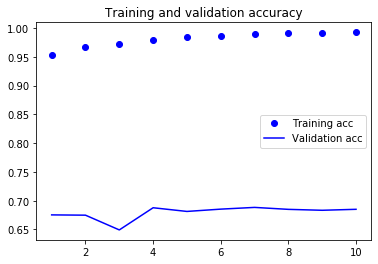

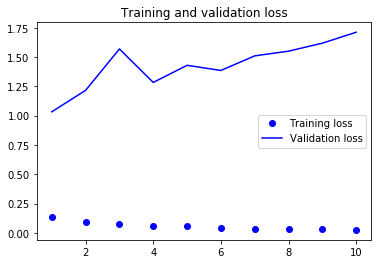

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Training the same model without pretrained word embeddings

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 257us/step - loss: 0.5357 - acc: 0.7177 - val_loss: 0.3996 - val_acc: 0.8169
Epoch 2/10
8000/8000 [==============================] - 2

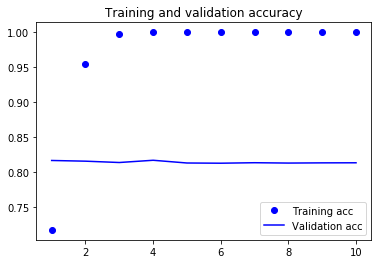

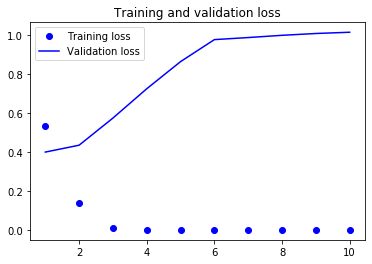

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Tokenizing the data of the test set

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Evaluating the model on the test set

In [16]:
model.load_weights('/content/drive/My Drive/TSAI_EVA/Phase_2/P2_S1_IMDB_RawData/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 65us/step


[1.6826075435256957, 0.67908]